# <font color='cyan'> Relatório análise de dados - Grupo 1 Diabetes </font>
---

### <font color='cyan'> Grupo: </font>

- César Noronha

- Beatriz Brito

- Julio Oliveira

### <font color='cyan'>Banco do dados:</font>
https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?select=diabetes_binary_5050split_health_indicators_BRFSS2015.csv

### <font color='cyan'>Variáveis:</font>

 0   Diabetes_binary       0 = no diabetes 1 = prediabetes or diabetes
 
 1   HighBP               0 = no high BP 1 = high BP  
 
 2   HighChol             0 = no high cholesterol 1 = high cholesterol  
 
 3   CholCheck            0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years  
 
 4   BMI                  Body Mass Index
 
 5   Smoker               Have you smoked at least 100 cigarettes in your entire life? 0 = no 1 = yes  
 
 6   Stroke               (Ever told) you had a stroke. 0 = no 1 = yes  
 
 7   HeartDiseaseorAttack coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes  
 
 8   PhysActivity         physical activity in past 30 days - not including job 0 = no 1 = yes  
 
 9   Fruits               Consume Fruit 1 or more times per day 0 = no 1 = yes  
 
 10  Veggies              Consume Vegetables 1 or more times per day 0 = no 1 = yes  
 
 11  HvyAlcoholConsump    (adult men >=14 drinks per week and adult women>=7 drinks per week) 0 = no 1 = yes  
 
 12  AnyHealthcare        Have any kind of health care coverage 0 = no 1 = yes  
 
 13  NoDocbcCost          Was there a time in the past 12 months when you needed to see a doctor but could not because 
 of cost? 0 = no 1 = yes  
 
 14  GenHlth               Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = 
 good 4 = fair 5 = poor
 
 15  MentHlth              days of poor mental health scale 1-30 days
 
 16  PhysHlth              physical illness or injury days in past 30 days scale 1-30
 
 17  DiffWalk              Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes  
 
 18  Sex                   0 = female 1 = male  
 
 19  Age                   13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older
 
 22  Education             Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only           
 kindergarten 2 = elementary etc.
 
 23  Income                Income scale  scale 1-8 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more

----
 ----

### <font color='cyan'> Importando bibliotecas e o banco de dados</font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import numpy as np

In [2]:
%pwd

'C:\\Users\\biabr\\OneDrive\\Área de Trabalho\\CEPEDI\\Diabetes_ML_Model-main\\main\\notebooks'

In [3]:
df = pd.read_csv("../datasets/raw/diabetes_binary_5050split_health_indicators_BRFSS2015.csv", low_memory=False)

df.shape

(70692, 22)

---
---

### <font color='cyan'> Modificando os tipos de varáveis nas colunas</font>


In [4]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

##### Obtendo o máximo e o mínimo de cada variável

In [6]:
features = df.columns
print('MÍNIMO =< FEATURE <=  MÁXIMO')
for feature in features:
    print(f'{df[feature].min()} <= {feature} <= {df[feature].max()}')

MÍNIMO =< FEATURE <=  MÁXIMO
0.0 <= Diabetes_binary <= 1.0
0.0 <= HighBP <= 1.0
0.0 <= HighChol <= 1.0
0.0 <= CholCheck <= 1.0
12.0 <= BMI <= 98.0
0.0 <= Smoker <= 1.0
0.0 <= Stroke <= 1.0
0.0 <= HeartDiseaseorAttack <= 1.0
0.0 <= PhysActivity <= 1.0
0.0 <= Fruits <= 1.0
0.0 <= Veggies <= 1.0
0.0 <= HvyAlcoholConsump <= 1.0
0.0 <= AnyHealthcare <= 1.0
0.0 <= NoDocbcCost <= 1.0
1.0 <= GenHlth <= 5.0
0.0 <= MentHlth <= 30.0
0.0 <= PhysHlth <= 30.0
0.0 <= DiffWalk <= 1.0
0.0 <= Sex <= 1.0
1.0 <= Age <= 13.0
1.0 <= Education <= 6.0
1.0 <= Income <= 8.0


##### Observando se há dados com varoles nulos ou "not a number"

In [7]:
print(f"""HÁ DADOS FALTANTES? {df.isnull().sum().any()}
HÁ DADOS NaN? {df.isna().sum().any()} 
""")

HÁ DADOS FALTANTES? False
HÁ DADOS NaN? False 



##### Obtendo quantidades de valores únicos para cada variável

In [8]:
valores_unicos = {}
for col in df.columns:
    valores_unicos[col] = df[col].value_counts().shape[0]
pd.DataFrame(valores_unicos, index=['Quatidade de valores únicos']).transpose()

,Quatidade de valores únicos
Diabetes_binary,2
HighBP,2
HighChol,2
CholCheck,2
BMI,80
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


In [9]:
colunas = ['HighBP', 'HighChol','CholCheck',  'Smoker','Stroke','HeartDiseaseorAttack', 
            'PhysActivity', 'Fruits', 'Veggies','HvyAlcoholConsump','AnyHealthcare', 
             'NoDocbcCost','DiffWalk', 'Sex', 'GenHlth', 'Diabetes_binary']
for coluna in colunas:
    df[coluna] = df[coluna].astype('uint8')


colunas = ['BMI', 'MentHlth','PhysHlth', 'Age', 'Education', 'Income']

for coluna in colunas:
    df[coluna] = df[coluna].astype('uint16')

df.columns = df.columns.str.lower()

In [10]:
output = open('../datasets/processed/df_numerado.pkl', 'wb')
pickle.dump(df, output)
output.close()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   diabetes_binary       70692 non-null  uint8 
 1   highbp                70692 non-null  uint8 
 2   highchol              70692 non-null  uint8 
 3   cholcheck             70692 non-null  uint8 
 4   bmi                   70692 non-null  uint16
 5   smoker                70692 non-null  uint8 
 6   stroke                70692 non-null  uint8 
 7   heartdiseaseorattack  70692 non-null  uint8 
 8   physactivity          70692 non-null  uint8 
 9   fruits                70692 non-null  uint8 
 10  veggies               70692 non-null  uint8 
 11  hvyalcoholconsump     70692 non-null  uint8 
 12  anyhealthcare         70692 non-null  uint8 
 13  nodocbccost           70692 non-null  uint8 
 14  genhlth               70692 non-null  uint8 
 15  menthlth              70692 non-null

##### <font color='cyan'> Resultado da transformação das variáveis</font>

Através da transformação dos tipos das variáveis fomos capares de reduzir o tamanho do dataframe de 11.9 MB para 1.9 MB.

___
___

### <font color='cyan'> Alterando variáveis para plotagem </font>

Criando novo dataframe contendo variáveis como objeto. A visualização dos gráficos fica melhor assim.

In [12]:
pkl_file = open('../datasets/processed/df_numerado.pkl', 'rb')
df_to_plot = pickle.load(pkl_file)
pkl_file.close()

In [13]:
df_to_plot.diabetes_binary[df_to_plot['diabetes_binary'] ==  0] = 'sem_diabetes'
df_to_plot.diabetes_binary[df_to_plot['diabetes_binary'] ==  1] = 'diabetes'
df_to_plot.highbp[df_to_plot['highbp'] ==  0] = 'pressao_normal'
df_to_plot.highbp[df_to_plot['highbp'] ==  1] = 'pressao_alta'
df_to_plot.highchol[df_to_plot['highchol'] ==  0] = 'colesterol_normal'
df_to_plot.highchol[df_to_plot['highchol'] ==  1] = 'colesterol_alto'
df_to_plot.smoker[df_to_plot['smoker'] ==  0] = 'não'
df_to_plot.smoker[df_to_plot['smoker'] ==  1] = 'sim'
df_to_plot.heartdiseaseorattack[df_to_plot['heartdiseaseorattack'] ==  0] = 'não'
df_to_plot.heartdiseaseorattack[df_to_plot['heartdiseaseorattack'] ==  1] = 'sim'
df_to_plot.stroke[df_to_plot['stroke'] ==  0] = 'não'
df_to_plot.stroke[df_to_plot['stroke'] ==  1] = 'sim'
df_to_plot.physactivity[df_to_plot['physactivity'] ==  0] = 'não'
df_to_plot.physactivity[df_to_plot['physactivity'] ==  1] = 'sim'
df_to_plot.fruits[df_to_plot['fruits'] ==  0] = 'não'
df_to_plot.fruits[df_to_plot['fruits'] ==  1] = 'sim'
df_to_plot.veggies[df_to_plot['veggies'] ==  0] = 'não'
df_to_plot.veggies[df_to_plot['veggies'] ==  1] = 'sim'
df_to_plot.hvyalcoholconsump[df_to_plot['hvyalcoholconsump'] ==  0] = 'não'
df_to_plot.hvyalcoholconsump[df_to_plot['hvyalcoholconsump'] ==  1] = 'sim'
df_to_plot.diffwalk[df_to_plot['diffwalk'] ==  0] = 'não'
df_to_plot.diffwalk[df_to_plot['diffwalk'] ==  1] = 'sim'
df_to_plot.anyhealthcare[df_to_plot['anyhealthcare'] ==  0] = 'não'
df_to_plot.anyhealthcare[df_to_plot['anyhealthcare'] ==  1] = 'sim'
df_to_plot.nodocbccost[df_to_plot['nodocbccost'] ==  0] = 'não'
df_to_plot.nodocbccost[df_to_plot['nodocbccost'] ==  1] = 'sim'
df_to_plot.genhlth[df_to_plot['genhlth'] == 1] = 'excelente'
df_to_plot.genhlth[df_to_plot['genhlth'] == 2] = 'muito_bom'
df_to_plot.genhlth[df_to_plot['genhlth'] == 3] = 'bom'
df_to_plot.genhlth[df_to_plot['genhlth'] == 4] = 'justo'
df_to_plot.genhlth[df_to_plot['genhlth'] == 5] = 'pobre'
df_to_plot.education[df_to_plot['education'] == 1] = 'nunca_frequentou'
df_to_plot.education[df_to_plot['education'] == 2] = 'elementar'
df_to_plot.education[df_to_plot['education'] == 3] = 'secundaria'
df_to_plot.education[df_to_plot['education'] == 4] = 'ensino_medio'
df_to_plot.education[df_to_plot['education'] == 5] = 'graduando_ou_técnico'
df_to_plot.education[df_to_plot['education'] == 6] = 'graduado'
df_to_plot.income[df_to_plot['income'] == 1] = '<10,000'
df_to_plot.income[df_to_plot['income'] == 2] = '<$10,000'
df_to_plot.income[df_to_plot['income'] == 3] = '<$10,000'
df_to_plot.income[df_to_plot['income'] == 4] = '<$10,000'
df_to_plot.income[df_to_plot['income'] == 5] = '<$35,000'
df_to_plot.income[df_to_plot['income'] == 6] = '<$35,000'
df_to_plot.income[df_to_plot['income'] == 7] = '<$35,000'
df_to_plot.income[df_to_plot['income'] == 8] = '$75,000=>'
df_to_plot.cholcheck[df_to_plot['cholcheck'] == 0] = 'Sem_checagem_em_5_anos'
df_to_plot.cholcheck[df_to_plot['cholcheck'] == 1] = 'com_checagem_em_5_anos'
df_to_plot.sex[df_to_plot['sex'] ==  0] = 'feminino'
df_to_plot.sex[df_to_plot['sex'] ==  1] = 'masculino'

C:\Users\biabr\AppData\Local\Temp\ipykernel_3420\2294675117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_plot.diabetes_binary[df_to_plot['diabetes_binary'] ==  0] = 'sem_diabetes'
C:\Users\biabr\AppData\Local\Temp\ipykernel_3420\2294675117.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_plot.highbp[df_to_plot['highbp'] ==  0] = 'pressao_normal'
C:\Users\biabr\AppData\Local\Temp\ipykernel_3420\2294675117.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

##### Salvando dataframe com Variáveis editadas

In [14]:
output = open('../datasets/processed/df_com_nomes.pkl', 'wb')
pickle.dump(df_to_plot, output)
output.close()

___
___

### <font color='cyan'> Observando e plotando a correlação entre variáveis </font>

In [15]:
df.corr().sort_values('diabetes_binary',ascending = False)

,diabetes_binary,highbp,highchol,cholcheck,bmi,smoker,stroke,heartdiseaseorattack,physactivity,fruits,...,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income
diabetes_binary,1.000000,0.381516,0.289213,0.115382,0.293373,0.085999,0.125427,0.211523,-0.158666,-0.054077,...,0.023191,0.040977,0.407612,0.087029,0.213081,0.272646,0.044413,0.278738,-0.170481,-0.224449
genhlth,0.407612,0.320540,0.237778,0.059213,0.267888,0.152416,0.189447,0.275868,-0.273548,-0.098687,...,-0.033060,0.169515,1.000000,0.315077,0.552757,0.476639,-0.014555,0.155624,-0.285420,-0.382969
highbp,0.381516,1.000000,0.316515,0.103283,0.241019,0.087438,0.129060,0.210750,-0.136102,-0.040852,...,0.035764,0.026517,0.320540,0.064294,0.173922,0.234784,0.040819,0.338132,-0.141643,-0.187657
bmi,0.293373,0.241019,0.131309,0.045648,1.000000,0.011551,0.022931,0.060355,-0.170936,-0.084505,...,-0.013417,0.065832,0.267888,0.104682,0.161862,0.246094,0.000827,-0.038648,-0.100233,-0.124878
highchol,0.289213,0.316515,1.000000,0.085981,0.131309,0.093398,0.099786,0.181187,-0.090453,-0.047384,...,0.031532,0.033199,0.237778,0.083881,0.142610,0.162043,0.017324,0.240338,-0.084386,-0.107777
age,0.278738,0.338132,0.240338,0.101743,-0.038648,0.105424,0.123879,0.221878,-0.100753,0.061096,...,0.136975,-0.129839,0.155624,-0.101746,0.084852,0.195265,-0.002315,1.000000,-0.107127,-0.130140
diffwalk,0.272646,0.234784,0.162043,0.044430,0.246094,0.119789,0.192266,0.232611,-0.276868,-0.050784,...,0.008113,0.127111,0.476639,0.251489,0.487976,1.000000,-0.082248,0.195265,-0.202590,-0.343245
physhlth,0.213081,0.173922,0.142610,0.034540,0.161862,0.120698,0.164488,0.198416,-0.234500,-0.048572,...,-0.003285,0.157451,0.552757,0.380272,1.000000,0.487976,-0.045957,0.084852,-0.159317,-0.279326
heartdiseaseorattack,0.211523,0.210750,0.181187,0.043497,0.060355,0.124418,0.223394,1.000000,-0.098223,-0.019436,...,0.015687,0.036029,0.275868,0.075057,0.198416,0.232611,0.098161,0.221878,-0.096559,-0.146748
stroke,0.125427,0.129060,0.099786,0.022529,0.022931,0.064658,1.000000,0.223394,-0.079985,-0.008996,...,0.006484,0.036198,0.189447,0.087303,0.164488,0.192266,0.003822,0.123879,-0.073926,-0.136577


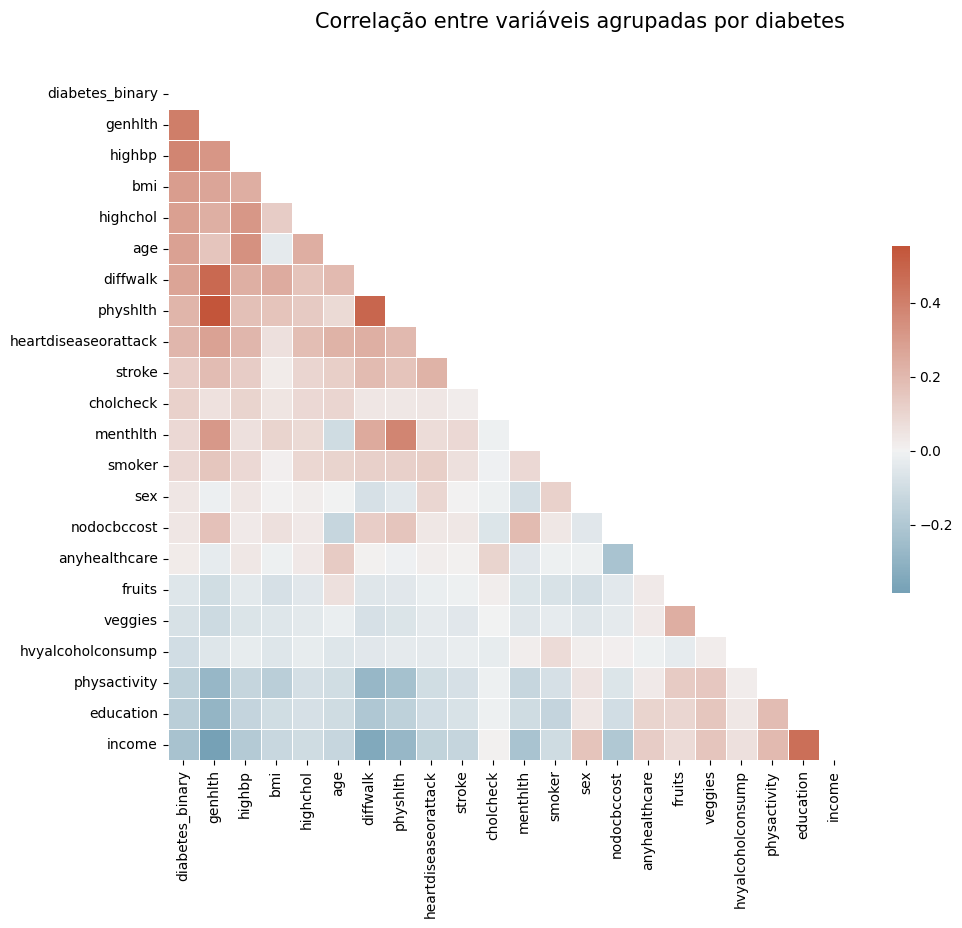

In [16]:
corr = df.corr()
corr2 =  corr.sort_values('diabetes_binary',axis=1,ascending = False)
corr2 =  corr2.sort_values('diabetes_binary',ascending = False)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
f.suptitle("Correlação entre variáveis agrupadas por diabetes", fontsize=15, y=0.95)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr2, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.savefig('../outputs/imgs/corr_plot.png', bbox_inches='tight')

<font color='cyan'> Correlações organizadas:</font> 

Gráficos de correlações por ordem de Correlação com a presença diabetes. Nesse gráfico podemos observar grupos de variáveis de correlação positiva e grupos de correlação negativa com a presença de diabetes. Cada grupo tende a ter uma correlação positiva entre sí e negativa com o outro grupo. Também podemos observar algumas excessões como se a pessoa fuma, e consome muito alcool. Saúde mental e idade e Sexo e renda.

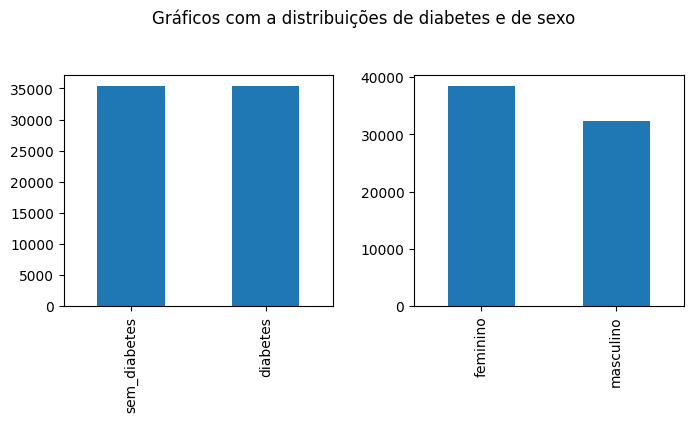

In [17]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
plt.subplots_adjust(hspace=0.5 ,wspace=0.3)
fig.suptitle("Gráficos com a distribuições de diabetes e de sexo", fontsize=12, y=1.1)

df_to_plot['diabetes_binary'].value_counts().plot(kind='bar', ax=ax1)

df_to_plot['sex'].value_counts().plot(kind='bar',ax=ax2)
plt.savefig('../outputs/imgs/diabetes_sex.png', bbox_inches = 'tight')
plt.show()

<font color='cyan'> Distribuições diabetes e sexo:</font> 

Podemos observar que temos um banco de dados balançeado entre sujeitos com e sem diabetes, enquanto temos uma quantidade maior de mulheres do que homens no banco de dados, porém proporcionalmente não é muito diferente

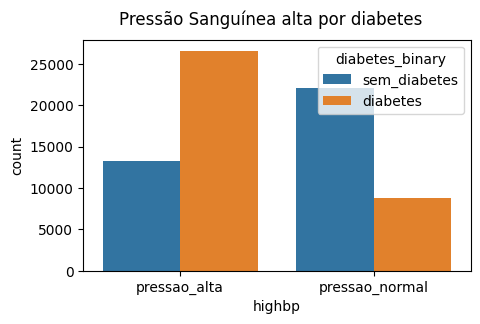

In [18]:
fig, ax = plt.subplots(figsize = ( 5 , 3 ))
sns.countplot(ax=ax, x='highbp', hue='diabetes_binary', data=df_to_plot)
fig.suptitle('Pressão Sanguínea alta por diabetes')
plt.savefig('../outputs/imgs/bar_plot_pressao_alta.png', bbox_inches='tight')

<font color='cyan'> Pressão Saguínea alta:</font> 

Entre os sujeitos Com uma taxa de pressão alta temos uma maior prevalência de sujeitos com diabetes, enquanto para os sujeitos sem pressão alta temos uma maior prevalência de sujeitos sem diabetes.

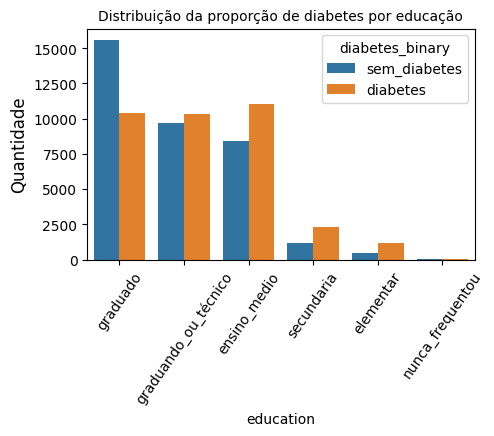

In [19]:
fig, ax = plt.subplots(figsize = ( 5 , 3 ))
sns.countplot(ax = ax, x='education', hue='diabetes_binary', data=df_to_plot);
plt.xticks(rotation=55)
# Set label for x-axis
#ax.set_xlabel( "Educação" , size = 12 )
  
# Set label for y-axis
ax.set_ylabel( "Quantidade" , size = 12 )
  
# Set title for plot
ax.set_title( "Distribuição da proporção de diabetes por educação" , size = 10 )
  
# Display figure

plt.savefig('../outputs/imgs/bar_plot_education.png', bbox_inches='tight')
plt.show()

<font color='cyan'> Nível de educação: </font>

Até um grau de educação 5 temos uma maior proporção de sujeitos com diabetes do que sem diabetes, com excessão do grau de educação 6 que temos sujeitos com menos diabetes. Com grau de educação 5 podemos observar uma tendência de redução.


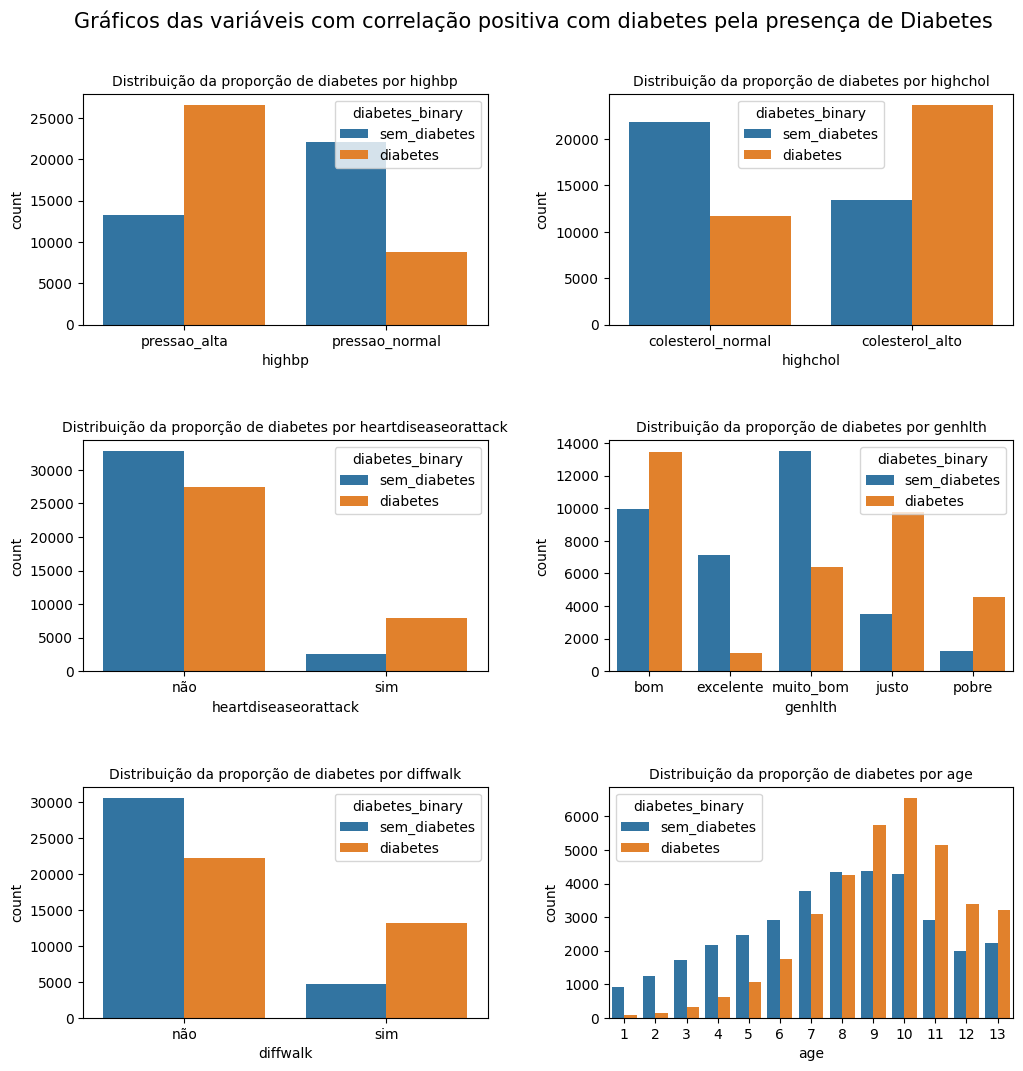

In [20]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
plt.subplots_adjust(hspace=0.5 ,wspace=0.3)
fig.suptitle("Gráficos das variáveis com correlação positiva com diabetes pela presença de Diabetes", fontsize=15, y=0.95)

PositivaCorr = [ 'highbp', 'highchol', 'heartdiseaseorattack', 'genhlth', 'diffwalk', 'age']

for column, ax in zip(PositivaCorr, axs.ravel()):
    sns.countplot(ax = ax, x=column, hue='diabetes_binary', data=df_to_plot);
    ax.set_title( f"Distribuição da proporção de diabetes por {column}" , size = 10 )

plt.savefig('../outputs/imgs/bar_plot_positive_corr.png')    
plt.show()

<font color='cyan'> Variáveis de correlação positiva:</font> 

Podemos observar a correlação da presença de diabetes em relação a alta pressão sanguínea (HighBP), altas taxas de colesterol (HighChol), se o sujeito já teve parada cardíaca (HearthDiseaseorAttack), e se o sujeito tem dificuldade de andar.  

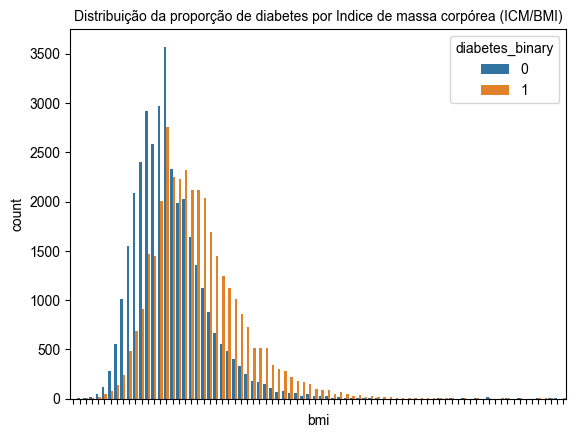

In [21]:
a = sns.countplot(x='bmi', hue='diabetes_binary', data=df);
a.set_title( f"Distribuição da proporção de diabetes por Indice de massa corpórea (ICM/BMI)" , size = 10 )
a.set_xticklabels([])
sns.set(rc={'figure.figsize':(12,6)})

plt.savefig('../outputs/imgs/bmi_x_diabetes.png', bbox_inches = 'tight')

<font color='cyan'> Indice de massa corpórea por presença de diabetes</font> 

Também podemos ver que a distribuição da massa corporea e a idade dos sujeitos com diabetes estão a direita da curva dos sem diabetes, indicando que a diabetes está relacionada a uma maior massa corpórea e a uma idade mais avançada. 

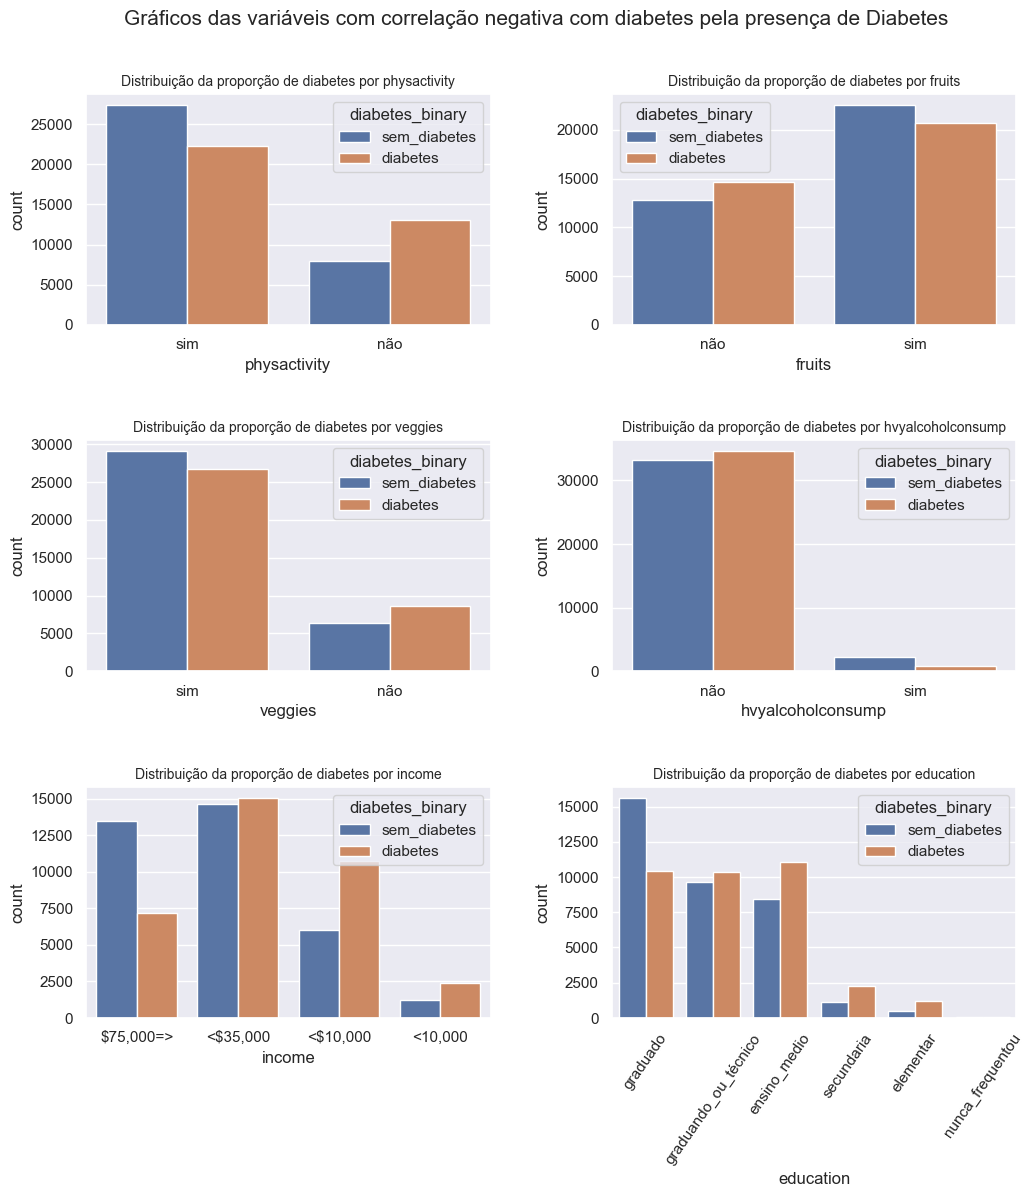

In [22]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
plt.subplots_adjust(hspace=0.5 ,wspace=0.3)
fig.suptitle("Gráficos das variáveis com correlação negativa com diabetes pela presença de Diabetes", fontsize=15, y=0.95)
plt.xticks(rotation=55)
NegativaCorr = [ 'physactivity', 'fruits', 'veggies', 'hvyalcoholconsump', 'income', 'education']

for column, ax in zip(NegativaCorr, axs.ravel()):
    
    sns.countplot(ax = ax, x=column, hue='diabetes_binary', data=df_to_plot);

    # Set label for x-axis
    ax.set_title( f"Distribuição da proporção de diabetes por {column}" , size = 10 )
    
plt.savefig('../outputs/imgs/bar_plot_negative_corr.png')     
plt.show()

 <font color='cyan'>Variáveis de correlação negativa:</font>

Para as variáveis com correlação negativa a presença de diabetes, podemos podemos observar uma relação mais fraca do que a das variáveis de correlação positiva. Para as variáveis Educação (Education) e Renda (Income) podemos observar uma relação mais forte para os sujeitos de maior renda ou educação.

---
---

####  <font color='cyan'>Observando grupos com caracteristicas saudáveis e grupos com características não saudáveis </font>


In [23]:
poorhealth = df_to_plot[(df.highchol == 1) & (df.highbp == 1) & (df.diffwalk == 1)]

goodhealth = df_to_plot[(df.physactivity == 1) & (df.veggies == 1) & (df.fruits == 1)]

highlevel = df_to_plot[(df.income == 8) & (df.education == 6)]

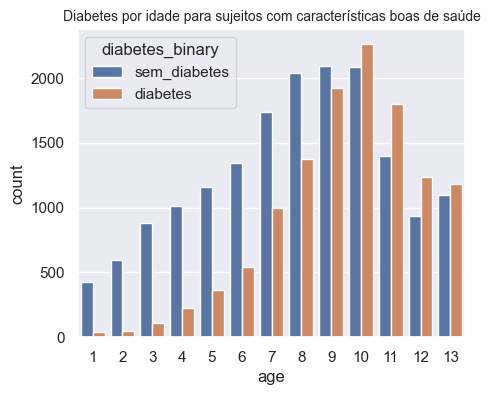

In [24]:
sns.set(rc={'figure.figsize':(5,4)})
a = sns.countplot(x='age', hue='diabetes_binary', data=goodhealth);
a.set_title( f"Diabetes por idade para sujeitos com características boas de saúde" , size = 10 )
plt.savefig('../outputs/imgs/age_goodhealth.png', bbox_inches = 'tight')

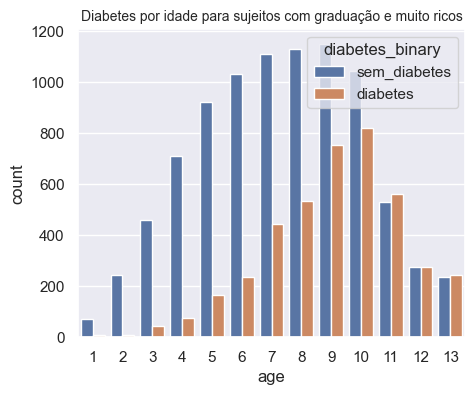

In [25]:
sns.set(rc={'figure.figsize':(5,4)})
a = sns.countplot(x='age', hue='diabetes_binary', data=highlevel);
a.set_title( f"Diabetes por idade para sujeitos com graduação e muito ricos" , size = 10 )
plt.savefig('../outputs/imgs/age_graduate_rich.png', bbox_inches = 'tight')

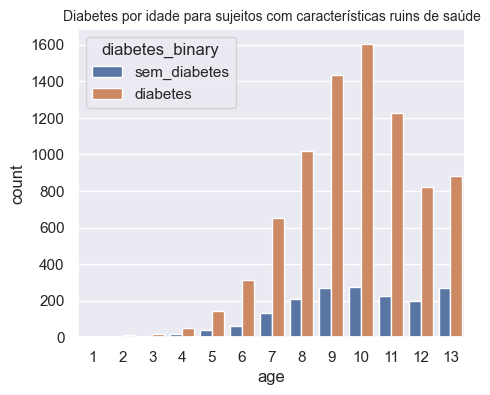

In [26]:
sns.set(rc={'figure.figsize':(5,4)})
a =sns.countplot(x='age', hue='diabetes_binary', data=poorhealth)
a.set_title( f"Diabetes por idade para sujeitos com características ruins de saúde" , size = 10 )
plt.savefig('../outputs/imgs/age_poorhealth.png', bbox_inches = 'tight')

 <font color='cyan'> Observamos uma diferença no comportamento da variável idade pra os grupos apresentados</font>

Tanto para os sujeitos com boas práticas de saúde, quanto para os sujeitos com alta renda e graduação, temos uma baixa presença de diabetes para os sujeitos mais jovens e uma presença equilibrada para os mais velhos. 

Já para os sujeitos com positivo para as características negativas de saúde, temos a prevalência da presença de diabetes mesmo para os mais jovens. 

___
___


### <font color='cyan'> Investigando sujeitos com alto consumo de alcool ('hvyalcoholconsump') </font>


In [27]:
altoconsumo = df_to_plot[(df.hvyalcoholconsump == 1)]
baixoconsumo = df_to_plot[(df.hvyalcoholconsump == 0)]

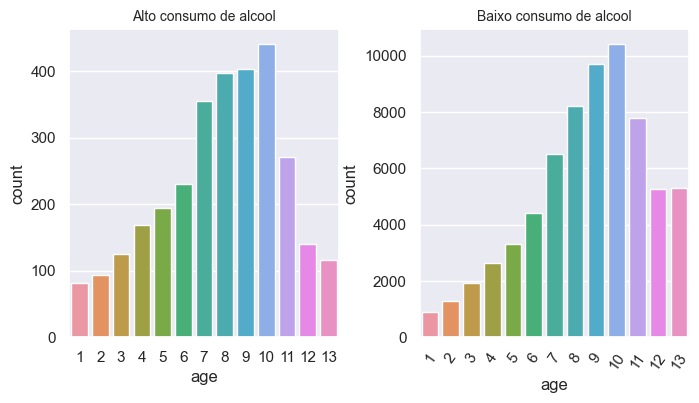

In [28]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
plt.subplots_adjust(hspace=0.5 ,wspace=0.3)
plt.xticks(rotation=55)

a =sns.countplot(x='age', data=altoconsumo, ax = ax1  )#, hue='diabetes_binary', data=altoconsumo, ax = ax1  )
a.set_title( f"Alto consumo de alcool" , size = 10)

a =sns.countplot(x='age', data=baixoconsumo, ax = ax2 )#, hue='diabetes_binary', data=baixoconsumo, ax = ax2 )
a.set_title( f"Baixo consumo de alcool" , size = 10)
    
plt.savefig('../outputs/imgs/hvyalcoholconsump_age.png')   
plt.show()

<font color='cyan'> Tendência de sujeitos com alto consumo de alcool é de serem mais jovens </font>

Podemos observar uma leve tendência dos sujeitos que possuem um alto comsumo de álcool a serem mais jovens, bem como observamos também uma proporção menor de sujeitos com alto comsumo de álcool no banco de dados. 

___
___

### <font color='cyan'> Modelo de Machine Learning

In [29]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, max_error

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import KFold

from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_auc_score


In [30]:
pkl_file = open('../datasets/processed/df_numerado.pkl', 'rb')
data = pickle.load(pkl_file)
pkl_file.close()

features = data.drop(columns='diabetes_binary')
target = data.diabetes_binary

In [31]:
data.sample(3)

,diabetes_binary,highbp,highchol,cholcheck,bmi,smoker,stroke,heartdiseaseorattack,physactivity,fruits,...,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income
14,0,0,1,1,29,1,0,0,1,1,...,1,0,1,0,0,1,0,10,5,1
25377,0,1,0,1,27,0,0,1,1,1,...,1,0,2,0,2,0,0,13,6,5
2691,0,1,0,1,29,1,0,1,1,1,...,1,0,4,0,30,1,0,9,5,1


In [32]:
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.4)

In [34]:
models = {
    "Decision Tree": DecisionTreeClassifier(
        class_weight= None,
        criterion= 'log_loss',
        max_depth= 7,
        min_samples_leaf= 5,
        splitter= 'best'),
    "Random Forest": RandomForestClassifier(),
    "K Neighbors": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC()
}

#define como transforma cada coluna para poder rodar no modelo de ML
numeric_features = ['bmi', 'genhlth', 'menthlth', 'age', 'education', 'income', 'physhlth']
numeric_transformer = SimpleImputer(strategy="median")

#Exemplo de transformar a coluna não numerica com ordem para intervalo valores.
ordinal_features = [] #não acho que é ordinal
ordinal_transformer = OrdinalEncoder()

#Exemplo de transformar uma coluna sem ordem para numerica.
categorical_features = ['highbp', 'highchol', 'cholcheck',  'smoker',
    'stroke', 'heartdiseaseorattack', 'physactivity', 'fruits', 'veggies',
    'hvyalcoholconsump', 'anyhealthcare', 'nodocbccost', 'diffwalk', 'sex']
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

#Cria o pipeline de transformações de coluna com as informações acima
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("le", ordinal_transformer, ordinal_features),
        ("ohe", categorical_transformer, categorical_features)
    ]
)

#lista vazia
scores = list()

#para cada modelo normaliza, treina e testa com cada métrica adicionando à lista
for model_name, model_obj in models.items():
    model = Pipeline([
        ("preprocessor", preprocessor), 
        ('scaler', StandardScaler()), #normalização
        ("PCA", PCA(n_components=.95)), #PCA
        ('clf', model_obj) #modelo de ML
    ])
    model.fit(train_x, train_y) #treino
    pred_y = model.predict(test_x) #previsão
    # Testes:
    scores.append({
        "model": model_name,
        "accuracy_score": accuracy_score(test_y, pred_y), 
        "precision_score": precision_score(test_y, pred_y), 
        "recall_score": recall_score(test_y, pred_y), 
        "f1_score": f1_score(test_y, pred_y), 
        "roc_auc": roc_auc_score(test_y, pred_y),
    })

pd.DataFrame(scores)

,model,accuracy_score,precision_score,recall_score,f1_score,roc_auc
0,Decision Tree,0.727871,0.697263,0.805418,0.747448,0.727873
1,Random Forest,0.729851,0.713068,0.769204,0.740073,0.729853
2,K Neighbors,0.709340,0.699521,0.733909,0.716303,0.709341
3,Logistic Regression,0.742158,0.735503,0.756260,0.745737,0.742158
4,SVM,0.744386,0.720457,0.798628,0.757531,0.744388


<font color='cyan'> Resultado dos testes de ML </font>

Baseado no dataframe acima chegamos a conclusão de que o modelo testado que apresentou melhores resultados foi o SVM (SVC). 

In [35]:
Pkl_Filename = "model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(models['SVM'], file)